In [72]:
import pandas as pd

In [137]:
data = pd.read_csv('cars-dataset.csv')

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


#### looks like hp variable may have non-numeric or missing values

In [77]:
# Dataset contains ? in few rows

In [140]:
Missing_Value = ["?"]

In [141]:
data = pd.read_csv('cars-dataset.csv',na_values=Missing_Value)

In [142]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [147]:
data.hp.describe() # As the data is right skewed. Median is a good choice to replace the current missing values

count    398.000000
mean     104.296482
std       38.224809
min       46.000000
25%       76.000000
50%       93.000000
75%      125.000000
max      230.000000
Name: hp, dtype: float64

In [148]:
data['hp'] = data['hp'].fillna(data['hp'].median()).astype(int)

### Exploring Data for Outliers

In [150]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.296482,38.224809,46.0,76.000,93.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


#### MPG, WT and HP variables have the outliers

In [152]:
desc = data.describe(include='all').transpose()

In [153]:
desc['iqr'] = desc['75%'] - desc['25%']
desc['miniqr'] = desc['25%'] - 1.5*(desc['iqr'])
desc['maxiqr'] = desc['75%'] + 1.5*(desc['iqr'])
desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,iqr,miniqr,maxiqr
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8,4,-2,14
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455,157.75,-132.375,498.625
hp,398,NaN,NaN,NaN,104.296,38.2248,46,76,93,125,230,49,2.5,198.5
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140,1384.25,147.375,5684.38
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8,3.35,8.8,22.2
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82,6,64,88
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6,11.5,0.25,46.25


In [154]:
data.drop(data[(data['mpg'] < desc.loc['mpg'].miniqr) | 
       (data['mpg'] > desc.loc['mpg'].maxiqr) | 
       (data['wt'] < desc.loc['wt'].miniqr) | 
       (data['wt'] > desc.loc['wt'].maxiqr) |
                  (data['hp'] < desc.loc['hp'].miniqr) | 
       (data['hp'] > desc.loc['hp'].maxiqr)].index,inplace=True)

In [155]:
data.shape

(386, 8)

In [95]:
cars.yr.value_counts()

73    37
78    36
76    34
82    31
75    30
81    29
79    29
80    28
77    28
71    28
74    27
72    27
70    22
Name: yr, dtype: int64

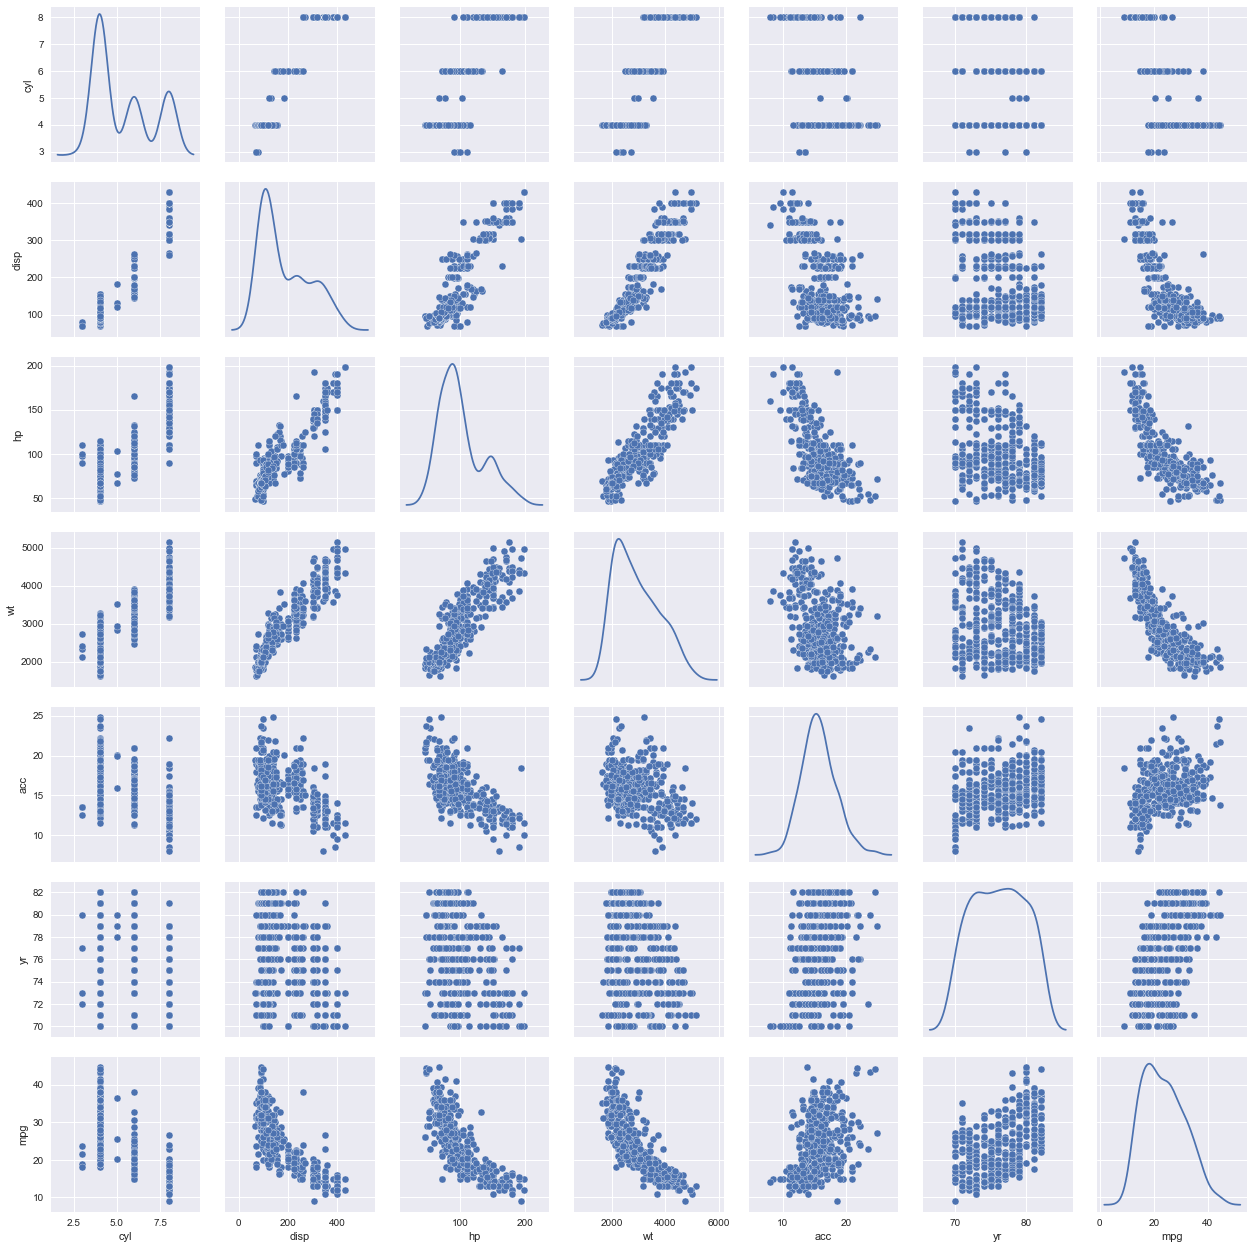

In [156]:
sns.pairplot(data, diag_kind='kde')

In [157]:
data.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.955477,0.853379,0.892149,-0.472061,-0.307965,-0.765059
disp,0.955477,1.000000,0.889688,0.937079,-0.492583,-0.319714,-0.801739
hp,0.853379,0.889688,1.000000,0.873629,-0.662489,-0.355186,-0.783519
wt,0.892149,0.937079,0.873629,1.000000,-0.375603,-0.261663,-0.826527
acc,-0.472061,-0.492583,-0.662489,-0.375603,1.000000,0.243659,0.387595
yr,-0.307965,-0.319714,-0.355186,-0.261663,0.243659,1.000000,0.555415
mpg,-0.765059,-0.801739,-0.783519,-0.826527,0.387595,0.555415,1.000000


In [158]:
from sklearn.preprocessing import StandardScaler

In [160]:
X = data.drop('yr',axis=1)

In [159]:
y = data.yr

In [161]:
X = X.drop('car name',axis=1)

In [162]:
import numpy as np

In [164]:
std = StandardScaler()
X_Std =  std.fit_transform(X)          
cov_matrix = np.cov(X_Std.T)
cov_matrix

array([[ 1.0025974 ,  0.95795912,  0.85559544,  0.89446651, -0.47328665,
        -0.76704572],
       [ 0.95795912,  1.0025974 ,  0.89199914,  0.93951302, -0.49386272,
        -0.80382183],
       [ 0.85559544,  0.89199914,  1.0025974 ,  0.87589841, -0.66421019,
        -0.78555415],
       [ 0.89446651,  0.93951302,  0.87589841,  1.0025974 , -0.37657891,
        -0.82867402],
       [-0.47328665, -0.49386272, -0.66421019, -0.37657891,  1.0025974 ,
         0.38860198],
       [-0.76704572, -0.80382183, -0.78555415, -0.82867402,  0.38860198,
         1.0025974 ]])

In [165]:
#Compute the eigen vectors and values using linear algebra lambda decomposition

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

Looks like one variable explains the most variation

### Calculate the CUM Explained Variance

In [171]:
total = eig_vals.sum()
explained_variance = [(each / total)*100 for each in eig_vals]

In [172]:
explained_variance.sort(reverse=True)

In [173]:
np.cumsum(explained_variance)

array([  79.04296003,   91.91492326,   96.4395621 ,   98.46775714,
         99.47910258,  100.        ])

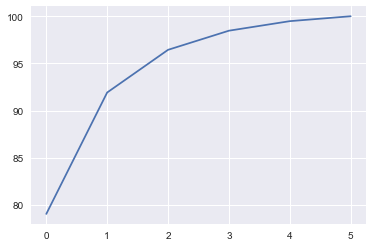

In [174]:
plt.plot(np.cumsum(explained_variance))

In [177]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(X_Std)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [178]:
pca.components_ 

array([[ 0.4330131 ,  0.44485934,  0.4379214 ,  0.43272658, -0.27549739,
        -0.39959175],
       [ 0.12971277,  0.12438169, -0.16001249,  0.27332383,  0.90408567,
        -0.22365818],
       [ 0.41688149,  0.29490765,  0.00244711,  0.11027556,  0.07679551,
         0.84922027],
       [-0.5545638 , -0.17116054,  0.61967178,  0.43639511,  0.14519908,
         0.26008938],
       [ 0.33693208, -0.21570555,  0.6259047 , -0.61233632,  0.26807599,
        -0.03702278],
       [ 0.44812927, -0.78983164, -0.08285563,  0.40060533, -0.08879883,
         0.01054583]])

In [179]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns.values)

In [180]:
X_dim = pca.transform(X_std)

In [181]:
X_dim.shape

(386, 6)

In [182]:
cols = X.columns

In [183]:
cols

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'mpg'], dtype='object')

In [185]:
X_new = pd.DataFrame(X_dim,columns=cols)

In [187]:
X_new = X_new.iloc[:,:3]

### Hierarchical Clustering

In [189]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [190]:
# generate the linkage matrix
Z = linkage(X_dim_new_1, 'ward', metric='euclidean')

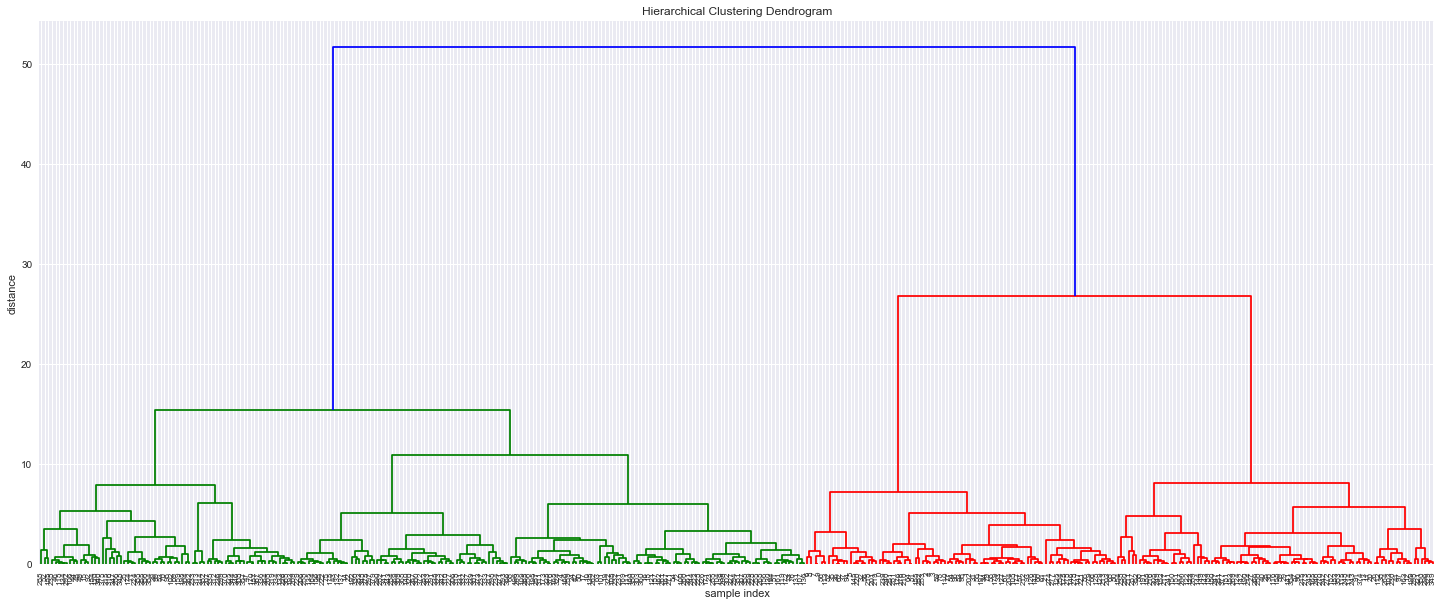

In [191]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

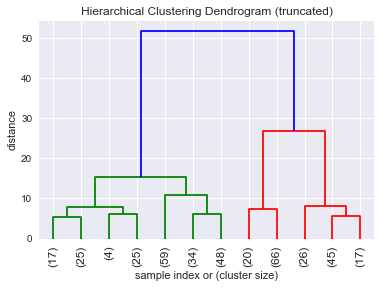

In [127]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

#### 4 Clusters is the optimum level of clusters

In [193]:
from scipy.cluster.hierarchy import fcluster
max_d = 15
clusters_h = fcluster(Z, max_d, criterion='distance')
clusters_h.shape

(386,)

### K Means Clustering

In [194]:
# Clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [195]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_dim_new_1)
    kmeanModel.fit(X_new)
    distortions.append(
        sum(np.min(cdist(X_new, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_dim_new_1.shape[0])

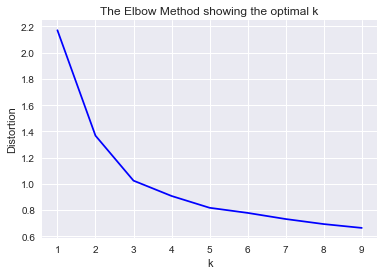

In [196]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [132]:
kmeans = KMeans(n_clusters=3)

In [197]:
kmeans.fit(X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [198]:
clusters_k = kmeans.labels_
clusters_k = pd.DataFrame(clusters_k)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X_dim_new_1, clusters_k, sample_size=386) # This has not given high value indicating there are overlapping values between clusters.

In [ ]:
X_dim_new_1.shape

In [ ]:
cars.shape

In [ ]:
clusters_k.shape

3 Clusters provide recently non-overlapping clusters

### Regression Model

In [ ]:
y = clusters

In [ ]:
y.shape

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size = 0.7, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(270, 3)
(116, 3)
(270,)
(116,)


In [202]:
from sklearn.linear_model.logistic import LogisticRegression
reg = LogisticRegression()

In [204]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [ ]:
reg.score(X_train,y_train)

In [ ]:
reg.score(X_test,y_test)

In [ ]:
from sklearn import metrics

In [206]:
print(metrics.accuracy_score(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

0.163793103448
col_0  70  71  72  73  75  76  78  79  80  82
yr                                           
70      3   0   3   0   0   2   0   0   0   0
71      0   0   1   1   2   0   0   0   0   1
72      1   0   0   3   0   0   0   0   0   1
73      0   0   3   6   3   1   0   0   1   0
74      0   0   1   1   2   1   2   1   1   0
75      0   0   2   2   1   0   0   1   0   0
76      0   0   0   2   4   1   0   0   0   2
77      0   1   0   1   2   1   0   0   0   3
78      0   0   1   1   4   0   2   1   1   3
79      1   0   1   0   1   0   1   2   0   2
80      0   0   0   0   1   0   0   1   0   8
81      1   0   0   0   2   1   2   1   0   5
82      0   1   0   0   1   1   0   1   1   4


In [ ]:
reg.coef_

In [207]:
print(reg.intercept_)
print(reg.coef_)

[-3.01990444 -2.3303354  -2.62610868 -2.88861955 -2.5457761  -2.40267358
 -2.22426472 -2.44266696 -2.28182001 -2.50325088 -2.91087835 -2.82670629
 -2.66996173]
[[  2.51370317e-01  -7.36375293e-01  -4.01360572e-01]
 [  1.03943878e-01  -1.81236343e-01  -4.58904740e-01]
 [  1.72492361e-01   1.91569958e-01  -1.67304805e+00]
 [  4.65111443e-01  -2.18457587e-01  -1.85831148e+00]
 [ -8.85778542e-02   1.98553406e-01  -4.60577468e-01]
 [  1.30151438e-01   5.13604734e-01  -7.82138575e-01]
 [  5.91120510e-02   1.46627299e-01  -4.01010507e-01]
 [  1.09948891e-01  -2.20437505e-02   2.94366597e-01]
 [  8.24493840e-05  -1.14321651e-01  -2.38128536e-01]
 [  6.94069356e-02   9.66565268e-02   1.13439558e+00]
 [ -4.43421855e-01   2.31754229e-02   8.28271338e-01]
 [ -2.90093035e-01  -1.13692927e-01   1.02027018e+00]
 [ -4.05798704e-01  -1.98241545e-01   8.28034998e-01]]
